<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.6
## Feature Encoding

### Data

**Predict the chronic kidney disease.**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

We use the following representation to collect the dataset 
- age	-	age	
- bp	-	blood pressure 
- sg	-	specific gravity 
- al	- albumin 
- su	-	sugar 
- rbc	-	red blood cells 
- pc	-	pus cell 
- pcc	-	pus cell clumps 
- ba	-	bacteria 
- bgr	-	blood glucose random 
- bu	-	blood urea 
- sc	-	serum creatinine 
- sod	-	sodium 
- pot	-	potassium 
- hemo	-	hemoglobin 
- pcv	-	packed cell volume 
- wc	-	white blood cell count 
- rc	-	red blood cell count 
- htn	-	hypertension 
- dm	-	diabetes mellitus 
- cad	-	coronary artery disease 
- appet	-	appetite 
- pe	-	pedal edema 
- ane	-	anemia 
- class	-	class




[Chronic Kidney Disease DataSet](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Load Data

In [2]:
# Read Data
kidney = pd.read_csv('kidney_disease.csv', index_col=['id'])

#### 2. Perform EDA

In [3]:
# Check Shape
kidney.shape

(400, 25)

In [4]:
# Check Head
kidney.head().T

id,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,NaN,423,117,106


In [5]:
kidney.sample(10).T

id,164,316,270,5,307,0,108,9,132,42
age,14,35,23,60,47,48,45,53,50,47
bp,NaN,NaN,80,90,60,80,80,90,NaN,100
sg,1.015,1.02,1.025,1.015,1.02,1.02,1.015,1.02,NaN,1.01
al,0,0,0,3,0,1,0,2,NaN,0
su,0,0,0,0,0,0,0,0,NaN,0
rbc,NaN,normal,normal,NaN,normal,NaN,NaN,abnormal,normal,NaN
pc,NaN,normal,normal,NaN,normal,normal,abnormal,abnormal,NaN,normal
pcc,notpresent,NaN,notpresent,notpresent,notpresent,notpresent,notpresent,present,notpresent,notpresent
ba,notpresent,NaN,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,192,99,111,74,137,121,107,70,219,204


In [6]:
kidney['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [7]:
kidney['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [8]:
kidney['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [9]:
kidney['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [10]:
kidney['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [11]:
kidney['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [12]:
kidney['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [13]:
kidney['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [14]:
kidney['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [15]:
kidney['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [16]:
kidney['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [17]:
# Check Data Types
kidney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [18]:
# Check Null Values
kidney.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [19]:
kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [20]:
# CLean pcv
kidney['pcv'] = pd.to_numeric(kidney['pcv'], errors='coerce')

In [21]:
# CLean wc
kidney['wc'] = pd.to_numeric(kidney['wc'], errors='coerce')

In [22]:
# CLean rc
kidney['rc'] = pd.to_numeric(kidney['rc'], errors='coerce')

In [23]:
# Clean dm
kidney['dm'] = kidney['dm'].apply(lambda x: 'no' if x == '\tno' else x)
kidney['dm'] = kidney['dm'].apply(lambda x: 'yes' if x == '\tyes' else x)
kidney['dm'] = kidney['dm'].str.strip()

In [24]:
# Clean cad
kidney['cad'] = kidney['cad'].apply(lambda x: 'no' if x == '\tno' else x)

In [25]:
# Clean classification
kidney['classification'] = kidney['classification'].apply(lambda x: 'ckd' if x == 'ckd\t' else x)

In [26]:
for c in kidney.select_dtypes(np.object):
    print(c)
    print(kidney[c].value_counts())
    print('-'*50)

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64
--------------------------------------------------
pc
normal      259
abnormal     76
Name: pc, dtype: int64
--------------------------------------------------
pcc
notpresent    354
present        42
Name: pcc, dtype: int64
--------------------------------------------------
ba
notpresent    374
present        22
Name: ba, dtype: int64
--------------------------------------------------
htn
no     251
yes    147
Name: htn, dtype: int64
--------------------------------------------------
dm
no     261
yes    137
Name: dm, dtype: int64
--------------------------------------------------
cad
no     364
yes     34
Name: cad, dtype: int64
--------------------------------------------------
appet
good    317
poor     82
Name: appet, dtype: int64
--------------------------------------------------
pe
no     323
yes     76
Name: pe, dtype: int64
--------------------------------------------------
ane
no     339
yes     60
Name: ane, dtype: i

In [27]:
kidney.sample(10).T

id,339,215,213,30,195,206,7,129,205,53
age,25,2,55,NaN,70,60,24,75,61,62
bp,70,NaN,80,70,90,70,NaN,70,70,80
sg,1.02,1.01,1.01,NaN,1.02,1.01,1.015,1.025,NaN,1.015
al,0,3,3,NaN,2,1,2,1,NaN,0
su,0,0,1,NaN,1,0,4,0,NaN,5
rbc,normal,normal,normal,NaN,abnormal,NaN,normal,NaN,NaN,NaN
pc,normal,abnormal,abnormal,NaN,abnormal,normal,abnormal,normal,NaN,NaN
pcc,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
ba,notpresent,notpresent,present,notpresent,present,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,88,NaN,214,93,184,109,410,158,100,246


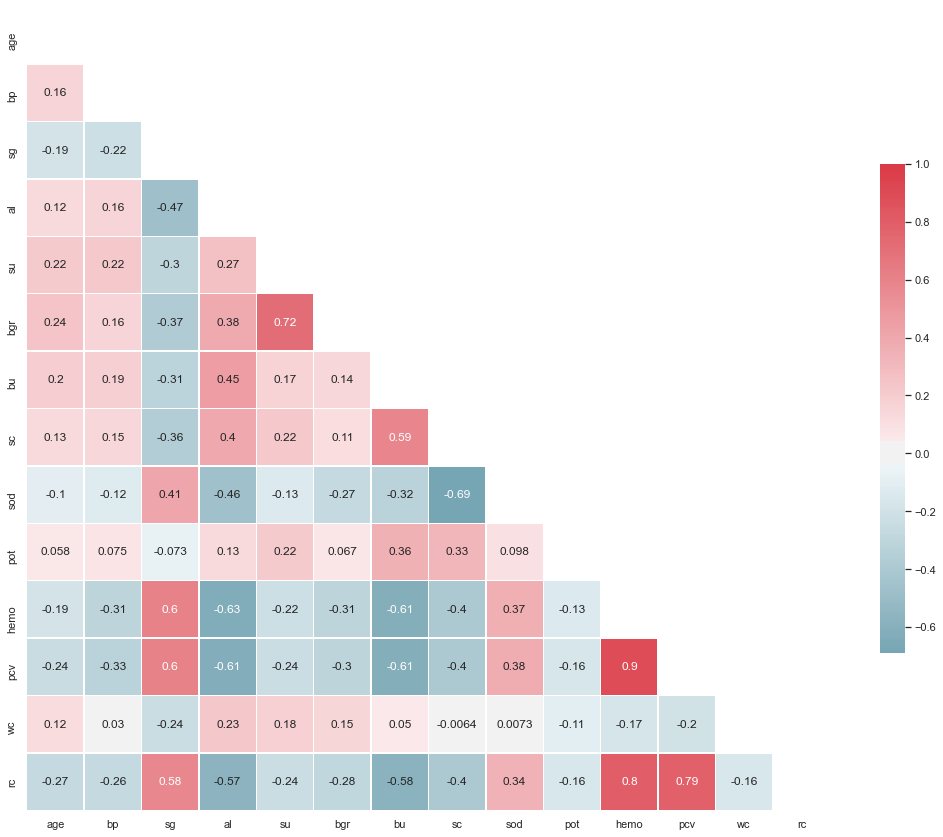

In [28]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(kidney.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(kidney.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

#### Impute Null Values

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
def impute_null(df, column_name, srategy='median'):
    imputer = SimpleImputer(missing_values = np.NaN, strategy = srategy)
    imputer = imputer.fit(df[[column_name]])
    return imputer.transform(df[[column_name]])

In [31]:
for l in list(kidney.select_dtypes(np.number).columns):
    kidney[l] = impute_null(kidney, l)

In [32]:
for l in list(kidney.select_dtypes(np.object).columns):
    kidney[l].fillna(kidney[l].value_counts().index[0], inplace=True)

In [33]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [34]:
kidney.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
375,70.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,74.0,...,48.0,9700.0,5.6,no,no,no,good,no,no,notckd
211,54.0,120.0,1.015,0.0,0.0,normal,normal,notpresent,notpresent,103.0,...,40.0,8000.0,4.8,no,no,no,good,no,no,ckd
349,35.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,82.0,...,52.0,9400.0,6.1,no,no,no,good,no,no,notckd
385,63.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,113.0,...,52.0,8000.0,5.1,no,no,no,good,no,no,notckd
64,55.0,80.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,146.0,...,40.0,8000.0,4.8,no,no,no,good,no,no,ckd
271,30.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,96.0,...,42.0,9000.0,4.5,no,no,no,good,no,no,notckd
203,55.0,90.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,207.0,...,40.0,8000.0,4.8,yes,yes,no,good,no,yes,ckd
332,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,10500.0,6.1,no,no,no,good,no,no,notckd
243,62.0,90.0,1.020,2.0,1.0,normal,normal,notpresent,notpresent,169.0,...,47.0,11000.0,6.1,yes,no,no,good,no,no,ckd


In [35]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

#### 3. Label Encoder

Encode labels with value between 0 and n_classes-1.

In [36]:
# Categorical boolean mask
categorical_feature_mask = kidney.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = kidney.columns[categorical_feature_mask].tolist()

In [37]:
categorical_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [38]:
categorical_feature_mask

age               False
bp                False
sg                False
al                False
su                False
rbc                True
pc                 True
pcc                True
ba                 True
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification     True
dtype: bool

In [39]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [40]:
# apply le on categorical feature columns
kidney[categorical_cols] = kidney[categorical_cols].apply(lambda col: le.fit_transform(col))
kidney[categorical_cols].head(10)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,1,0,0,1,0,0
6,1,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,1,0,0
8,1,0,1,0,1,1,0,0,0,1,0


In [41]:
kidney[categorical_cols].sample(10)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
302,1,1,0,0,0,0,0,0,0,0,1
233,1,1,0,1,0,0,0,1,0,0,0
113,1,1,0,0,0,1,0,1,0,1,0
368,1,1,0,0,0,0,0,0,0,0,1
280,1,1,0,0,0,0,0,0,0,0,1
72,1,0,1,0,1,1,0,0,1,0,0
145,0,0,0,1,1,1,1,1,1,1,0
337,1,1,0,0,0,0,0,0,0,0,1
228,1,1,0,0,1,0,0,0,0,0,0


In [42]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1


####  6. Set Target 

In [43]:
target_column = 'classification'
feature_columns = [c for c in kidney.columns if c != target_column]

In [44]:
feature_columns

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [45]:
# Set X and y
y = kidney[target_column]
X = kidney[feature_columns]

In [46]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0


In [47]:
y

id
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [48]:
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Create an instance of SelectKBest
kbest = SelectKBest(score_func=chi2, k=4)

In [49]:
# Fit 
fit = kbest.fit(X, y)

In [50]:
# Print Score 
# Find Top 4 Features
pd.DataFrame(fit.scores_, index=feature_columns)

,0
age,115.859940
bp,81.786701
sg,0.005035
al,216.000000
su,94.800000
rbc,3.754674
pc,10.696296
pcc,25.200000
ba,13.200000
bgr,2241.651289


In [54]:
fit.get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False])

In [55]:
final_columns = X.columns[fit.get_support()]

In [57]:
# Transform X to Features
features = fit.transform(X)

In [58]:
# Transform features to a dataframe
pd.DataFrame(features, columns = final_columns) 

,bgr,bu,sc,wc
0,121.0,36.0,1.2,7800.0
1,121.0,18.0,0.8,6000.0
2,423.0,53.0,1.8,7500.0
3,117.0,56.0,3.8,6700.0
4,106.0,26.0,1.4,7300.0
...,...,...,...,...
395,140.0,49.0,0.5,6700.0
396,75.0,31.0,1.2,7800.0
397,100.0,26.0,0.6,6600.0
398,114.0,50.0,1.0,7200.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [59]:
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, y)
print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s", fit.support_) 
print("Feature Ranking: %s", fit.ranking_)

/Users/gregory_murray/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gregory_murray/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Num Features: %d 4
Selected Features: %s [False False False  True False False False False False False False  True
 False False False False False False  True  True False False False False]
Feature Ranking: %s [19 14 12  1  4  6  8 16 18 17 20  1 13 11  2 10 21  5  1  1 15  3  7  9]


In [60]:
# Print Score 
# Find Top 4 Features
pd.DataFrame(fit.support_, index=feature_columns)

,0
age,False
bp,False
sg,False
al,True
su,False
rbc,False
pc,False
pcc,False
ba,False
bgr,False


In [64]:
pd.DataFrame(fit.ranking_, index=feature_columns)

,0
age,19
bp,14
sg,12
al,1
su,4
rbc,6
pc,8
pcc,16
ba,18
bgr,17


In [65]:
final_columns =X.columns[fit.support_]

In [66]:
final_columns

Index(['al', 'sc', 'htn', 'dm'], dtype='object')

In [67]:
# Transform X to Features
features = fit.transform(X)

In [68]:
pd.DataFrame(features, columns=final_columns) 

,al,sc,htn,dm
0,1.0,1.2,1.0,1.0
1,4.0,0.8,0.0,0.0
2,2.0,1.8,0.0,1.0
3,4.0,3.8,1.0,0.0
4,2.0,1.4,0.0,0.0
...,...,...,...,...
395,0.0,0.5,0.0,0.0
396,0.0,1.2,0.0,0.0
397,0.0,0.6,0.0,0.0
398,0.0,1.0,0.0,0.0




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



